You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');
download('https://github.com/ramalho/jupyturtle/releases/download/2024-03/jupyturtle.py');

import thinkpython

# Conditionals and Recursion

The main topic of this chapter is the `if` statement, which executes different code depending on the state of the program.
And with the `if` statement we'll be able to explore one of the most powerful ideas in computing, **recursion**.

But we'll start with three new features: the modulus operator, boolean expressions, and logical operators.

## Integer division and modulus

Recall that the integer division operator, `//`, divides two numbers and rounds
down to an integer.
For example, suppose the run time of a movie is 105 minutes.
You might want to know how long that is in hours.
Conventional division returns a floating-point number:

In [3]:
minutes = 105
minutes / 60

1.75

But we don't normally write hours with decimal points.
Integer division returns the integer number of hours, rounding down:

In [4]:
minutes = 105
hours = minutes // 60
hours

1

To get the remainder, you could subtract off one hour in minutes:

In [5]:
remainder = minutes - hours * 60
remainder

45

Or you could use the **modulus operator**, `%`, which divides two numbers and returns the remainder.

In [6]:
remainder = minutes % 60
remainder

45

The modulus operator is more useful than it might seem.
For example, it can check whether one number is divisible by another -- if `x % y` is zero, then `x` is divisible by `y`.

Also, it can extract the right-most digit or digits from a number.
For example, `x % 10` yields the right-most digit of `x` (in base 10).
Similarly, `x % 100` yields the last two digits.

In [7]:
x = 123
x % 10

3

In [8]:
x % 100

23

Finally, the modulus operator can do "clock arithmetic".
For example, if an event starts at 11 AM and lasts three hours, we can use the modulus operator to figure out what time it ends.

In [9]:
start = 11
duration = 3
end = (start + duration) % 12
end

2

The event would end at 2 PM.

## Boolean Expressions

A **boolean expression** is an expression that is either true or false.
For example, the following expressions use the equals operator, `==`, which compares two values and produces `True` if they are equal and `False` otherwise:

In [10]:
5 == 5

True

In [11]:
5 == 7

False

A common error is to use a single equal sign (`=`) instead of a double equal sign (`==`).
Remember that `=` assigns a value to a variable and `==` compares two values.

In [12]:
x = 5
y = 7

In [13]:
x == y

False

`True` and `False` are special values that belong to the type `bool`;
they are not strings:

In [14]:
type(True)

bool

In [15]:
type(False)

bool

The `==` operator is one of the **relational operators**; the others are:

In [16]:
x != y               # x is not equal to y

True

In [17]:
x > y                # x is greater than y

False

In [ ]:
x < y               # x is less than to y

In [18]:
x >= y               # x is greater than or equal to y

False

In [19]:
x <= y               # x is less than or equal to y

True

## Logical operators

To combine boolean values into expressions, we can use **logical operators**.
The most common are `and`, ` or`, and `not`.
The meaning of these operators is similar to their meaning in English.
For example, the value of the following expression is `True` only if `x` is greater than `0` *and* less than `10`.

In [20]:
x > 0 and x < 10

True

The following expression is `True` if *either or both* of the conditions is true, that is, if the number is divisible by 2 *or* 3:

In [21]:
x % 2 == 0 or x % 3 == 0

False

Finally, the `not` operator negates a boolean expression, so the following expression is `True` if `x > y` is `False`.

In [ ]:
not x > y

Strictly speaking, the operands of a logical operator should be boolean expressions, but Python is not very strict.
Any nonzero number is interpreted as `True`:

In [22]:
42 and True

True

This flexibility can be useful, but there are some subtleties to it that can be confusing.
You might want to avoid it.

## if statements

In order to write useful programs, we almost always need the ability to
check conditions and change the behavior of the program accordingly.
**Conditional statements** give us this ability. The simplest form is
the `if` statement:

In [23]:
if x > 0:
    print('x is positive')

x is positive


`if` is a Python keyword.
`if` statements have the same structure as function definitions: a
header followed by an indented statement or sequence of statements called a **block**.

The boolean expression after `if` is called the **condition**.
If it is true, the statements in the indented block run. If not, they don't.

There is no limit to the number of statements that can appear in the block, but there has to be at least one.
Occasionally, it is useful to have a block that does nothing -- usually as a place keeper for code you haven't written yet.
In that case, you can use the `pass` statement, which does nothing.

In [24]:
if x < 0:
    pass          # TODO: need to handle negative values!

The word `TODO` in a comment is a conventional reminder that there's something you need to do later.

## The `else` clause

An `if` statement can have a second part, called an `else` clause.
The syntax looks like this:

In [25]:
if x % 2 == 0:
    print('x is even')
else:
    print('x is odd')

x is odd


If the condition is true, the first indented statement runs; otherwise, the second indented statement runs.

In this example, if `x` is even, the remainder when `x` is divided by `2` is `0`, so the condition is true and the program displays `x is even`.
If `x` is odd, the remainder is `1`, so the condition
is false, and the program displays `x is odd`.

Since the condition must be true or false, exactly one of the alternatives will run.
The alternatives are called **branches**.

## Chained conditionals

Sometimes there are more than two possibilities and we need more than two branches.
One way to express a computation like that is a **chained conditional**, which includes an `elif` clause.

In [ ]:
if x < y:
    print('x is less than y')
elif x > y:
    print('x is greater than y')
else:
    print('x and y are equal')

`elif` is an abbreviation of "else if".
There is no limit on the number of `elif` clauses.
If there is an `else` clause, it has to be at the end, but there doesn't have to be
one.

Each condition is checked in order.
If the first is false, the next is checked, and so on.
If one of them is true, the corresponding branch runs and the `if` statement ends.
Even if more than one condition is true, only the first true branch runs.

## Nested Conditionals

One conditional can also be nested within another.
We could have written the example in the previous section like this:

In [ ]:
if x == y:
    print('x and y are equal')
else:
    if x < y:
        print('x is less than y')
    else:
        print('x is greater than y')

The outer `if` statement contains two branches.
The first branch contains a simple statement. The second branch contains another `if` statement, which has two branches of its own.
Those two branches are both simple statements, although they could have been conditional statements as well.

Although the indentation of the statements makes the structure apparent, **nested conditionals** can be difficult to read.
I suggest you avoid them when you can.

Logical operators often provide a way to simplify nested conditional statements.
Here's an example with a nested conditional.

In [ ]:
if 0 < x:
    if x < 10:
        print('x is a positive single-digit number.')

The `print` statement runs only if we make it past both conditionals, so we get the same effect with the `and` operator.

In [ ]:
if 0 < x and x < 10:
    print('x is a positive single-digit number.')

For this kind of condition, Python provides a more concise option:

In [ ]:
if 0 < x < 10:
    print('x is a positive single-digit number.')

## Recursion

It is legal for a function to call itself.
It may not be obvious why that is a good thing, but it turns out to be one of the most magical things a program can do.
Here's an example.

In [26]:
def countdown(n):
    if n <= 0:
        print('Blastoff!')
    else:
        print(n)
        countdown(n-1)

If `n` is 0 or negative, `countdown` outputs the word, "Blastoff!" Otherwise, it
outputs `n` and then calls itself, passing `n-1` as an argument.

Here's what happens when we call this function with the argument `3`.

In [27]:
countdown(3)

3
2
1
Blastoff!


The execution of `countdown` begins with `n=3`, and since `n` is greater
than `0`, it displays `3`, and then calls itself\...

> The execution of `countdown` begins with `n=2`, and since `n` is
> greater than `0`, it displays `2`, and then calls itself\...
>
> > The execution of `countdown` begins with `n=1`, and since `n` is
> > greater than `0`, it displays `1`, and then calls itself\...
> >
> > > The execution of `countdown` begins with `n=0`, and since `n` is
> > > not greater than `0`, it displays "Blastoff!" and returns.
> >
> > The `countdown` that got `n=1` returns.
>
> The `countdown` that got `n=2` returns.

The `countdown` that got `n=3` returns.

A function that calls itself is **recursive**.
As another example, we can write a function that prints a string `n` times.

In [28]:
def print_n_times(string, n):
    if n > 0:
        print(string)
        print_n_times(string, n-1)

If `n` is positive, `print_n_times` displays the value of `string` and then calls itself, passing along `string` and `n-1` as arguments.

If `n` is `0` or negative, the condition is false and `print_n_times` does nothing.

Here's how it works.

In [29]:
print_n_times('Spam ', 4)

Spam 
Spam 
Spam 
Spam 


For simple examples like this, it is probably easier to use a `for`
loop. But we will see examples later that are hard to write with a `for`
loop and easy to write with recursion, so it is good to start early.

## Stack diagrams for recursive functions

Here's a stack diagram that shows the frames created when we called `countdown` with `n = 3`.

In [30]:
from diagram import make_frame, Stack

frames = []
for n in [3,2,1,0]:
    d = dict(n=n)
    frame = make_frame(d, name='countdown', dy=-0.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

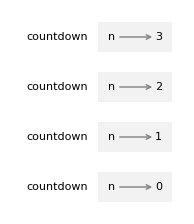

In [31]:
from diagram import diagram, adjust


width, height, x, y = [1.74, 2.04, 1.05, 1.77]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

The four `countdown` frames have different values for the parameter `n`.
The bottom of the stack, where `n=0`, is called the **base case**.
It does not make a recursive call, so there are no more frames.

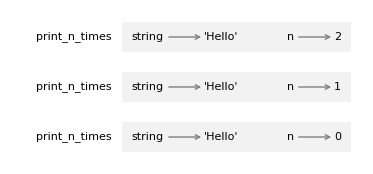

In [32]:
from diagram import make_frame, Stack
from diagram import diagram, adjust

frames = []
for n in [2,1,0]:
    d = dict(string='Hello', n=n)
    frame = make_frame(d, name='print_n_times', dx=1.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

width, height, x, y = [3.53, 1.54, 1.54, 1.27]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

## Infinite recursion

If a recursion never reaches a base case, it goes on making recursive
calls forever, and the program never terminates. This is known as
**infinite recursion**, and it is generally not a good idea.
Here's a minimal function with an infinite recursion.

In [ ]:
def recurse():
    recurse()

Every time `recurse` is called, it calls itself, which creates another frame.
In Python, there is a limit to the number of frames that can be on the stack at the same time.
If a program exceeds the limit, it causes a runtime error.

In [ ]:
%xmode Context

In [ ]:
%%expect RecursionError

recurse()

The traceback indicates that there were almost 3000 frames on the stack when the error occurred.

If you encounter an infinite recursion by accident, review your function to confirm that there is a base case that does not make a recursive call. And if there is a base case, check whether you are guaranteed to reach it.

## Keyboard input

The programs we have written so far accept no input from the user. They
just do the same thing every time.

Python provides a built-in function called `input` that stops the
program and waits for the user to type something. When the user presses
*Return* or *Enter*, the program resumes and `input` returns what the user
typed as a string.

In [ ]:
# Solution goes here

In [33]:
text = input()

yes


Before getting input from the user, you might want to display a prompt
telling the user what to type. `input` can take a prompt as an argument:

In [34]:
print("type your name")

type your name


In [35]:
name = input('What...is your name?\n')
name

What...is your name?
ulas


'ulas'

The sequence `\n` at the end of the prompt represents a **newline**, which is a special character that causes a line break -- that way the user's input appears below the prompt.

If you expect the user to type an integer, you can use the `int` function to convert the return value to `int`.

In [ ]:
# Solution goes here

In [36]:
prompt = 'What...is the airspeed velocity of an unladen swallow?\n'
speed = input(prompt)
speed

What...is the airspeed velocity of an unladen swallow?
22


'22'

But if they type something that's not an integer, you'll get a runtime error.

In [ ]:
%xmode Minimal

In [ ]:
%%expect ValueError

int(speed)

We will see how to handle this kind of error later.

## Debugging

When a syntax or runtime error occurs, the error message contains a lot
of information, but it can be overwhelming. The most useful parts are
usually:

-   What kind of error it was, and

-   Where it occurred.

Syntax errors are usually easy to find, but there are a few gotchas.
Errors related to spaces and tabs can be tricky because they are invisible
and we are used to ignoring them.

In [38]:
%%expect IndentationError
x = 5
y = 6

In this example, the problem is that the second line is indented by one space.
But the error message points to `y`, which is misleading.
Error messages indicate where the problem was discovered, but the actual error might be earlier in the code.

The same is true of runtime errors.
For example, suppose you are trying to convert a ratio to decibels, like this:

In [ ]:
%xmode Context

In [ ]:
%%expect ValueError
import math
numerator = 9
denominator = 10
ratio = numerator // denominator
decibels = 10 * math.log10(ratio)

The error message indicates line 5, but there is nothing wrong with that line.
The problem is in line 4, which uses integer division instead of floating-point division -- as a result, the value of `ratio` is `0`.
When we call `math.log10`, we get a `ValueError` with the message `math domain error`, because `0` is not in the "domain" of valid arguments for `math.log10`, because the logarithm of `0` is undefined.

In general, you should take the time to read error messages carefully, but don't assume that everything they say is correct.

## Glossary

**recursion:**
The process of calling the function that is currently executing.

**modulus operator:**
An operator, `%`, that works on integers and returns the remainder when one number is divided by another.

**boolean expression:**
An expression whose value is either `True` or `False`.

**relational operator:**
One of the operators that compares its operands: `==`, `!=`, `>`, `<`, `>=`, and `<=`.

**logical operator:**
One of the operators that combines boolean expressions, including `and`, `or`, and `not`.

**conditional statement:**
A statement that controls the flow of execution depending on some condition.

**condition:**
The boolean expression in a conditional statement that determines which branch runs.

**block:**
One or more statements indented to indicate they are part of another statement.

**branch:**
One of the alternative sequences of statements in a conditional statement.

**chained conditional:**
A conditional statement with a series of alternative branches.

**nested conditional:**
A conditional statement that appears in one of the branches of another conditional statement.

**recursive:**
A function that calls itself is recursive.

**base case:**
A conditional branch in a recursive function that does not make a recursive call.

**infinite recursion:**
A recursion that doesn't have a base case, or never reaches it.
Eventually, an infinite recursion causes a runtime error.

**newline:**
A character that creates a line break between two parts of a string.

## Exercises

In [39]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

* Ask a virtual assistant, "What are some uses of the modulus operator?"

* Python provides operators to compute the logical operations `and`, `or`, and `not`, but it doesn't have an operator that computes the exclusive `or` operation, usually written `xor`. Ask an assistant "What is the logical xor operation and how do I compute it in Python?"

In this chapter, we saw two ways to write an `if` statement with three branches, using a chained conditional or a nested conditional.
You can use a virtual assistant to convert from one to the other.
For example, ask a VA, "Convert this statement to a chained conditional."

In [ ]:
x = 5
y = 7

In [ ]:
if x == y:
    print('x and y are equal')
else:
    if x < y:
        print('x is less than y')
    else:
        print('x is greater than y')

Ask a VA, "Rewrite this statement with a single conditional."

In [ ]:
if 0 < x:
    if x < 10:
        print('x is a positive single-digit number.')

See if a VA can simplify this unnecessary complexity.

In [ ]:
if not x <= 0 and not x >= 10:
    print('x is a positive single-digit number.')

Here's an attempt at a recursive function that counts down by two.

In [40]:
def countdown_by_two(n):
    if n == 0:
        print('Blastoff!')
    else:
        print(n)
        countdown_by_two(n-2)

It seems to work.

In [41]:
countdown_by_two(6)

6
4
2
Blastoff!


But it has an error. Ask a virtual assistant what's wrong and how to fix it.
Paste the solution it provides back here and test it.

### Exercise

The `time` module provides a function, also called `time`, that returns
returns the number of seconds since the "Unix epoch", which is January 1, 1970, 00:00:00 UTC (Coordinated Universal Time).

In [103]:
from time import time

now = time()
now

1730903200.2541883

Use integer division and the modulus operator to compute the number of days since January 1, 1970 and the current time of day in hours, minutes, and seconds.

You can read more about the `time` module at <https://docs.python.org/3/library/time.html>.

In [104]:
sec = 1
min = 60 * sec
hour = 60* min
day = 24 * hour

In [106]:
days = now//day
remaining_seconds = now%day
mins = remaining_seconds//min
seconds = remaining_seconds%min


In [107]:
print("it has been "+str(days)+" days "+str(mins)+" minutes "+str(round(seconds))+" seconds")

it has been 20033.0 days 866.0 minutes 40 seconds


In [ ]:
# Solution goes here

### Exercise

If you are given three sticks, you may or may not be able to arrange
them in a triangle. For example, if one of the sticks is 12 inches long
and the other two are one inch long, you will not be able to get the
short sticks to meet in the middle. For any three lengths, there is a
test to see if it is possible to form a triangle:

> If any of the three lengths is greater than the sum of the other two,
> then you cannot form a triangle. Otherwise, you can. (If the sum of
> two lengths equals the third, they form what is called a "degenerate"
> triangle.)

Write a function named `is_triangle` that takes three integers as
arguments, and that prints either "Yes" or "No", depending on
whether you can or cannot form a triangle from sticks with the given
lengths. Hint: Use a chained conditional.



In [152]:
def is_triangle(len1,len2,len3):
  if(len1 > len2 and len3):
    if((len2+len3)>=len1):
      print("Yes")
    else:
      print("No")

  elif(len2 > len1 and len3):
    if((len1+len3)>=len2):
      print("Yes")
    else:
      print("No")

  elif(len3 > len1 and len2):
    if((len1+len2)>=len3):
       print("Yes")
    else:
      print("No")

  else:
    print("No")

Test your function with the following cases.

In [148]:
is_triangle(4, 5, 6)   # should be Yes

Yes


In [149]:
is_triangle(1, 2, 3)   # should be Yes

Yes


In [150]:
is_triangle(6, 2, 3)   # should be No

No


In [151]:
is_triangle(1, 1, 12)   # should be No

No


### Exercise

What is the output of the following program? Draw a stack diagram that
shows the state of the program when it prints the result.

In [153]:
def recurse(n, s):
    if n == 0:
        print(s)
    else:
        recurse(n-1, n+s)

recurse(3, 0)

6


In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

### Exercise

The following exercises use the `jupyturtle` module, described in Chapter 4.

Read the following function and see if you can figure out what it does.
Then run it and see if you got it right.
Adjust the values of `length`, `angle` and `factor` and see what effect they have on the result.
If you are not sure you understand how it works, try asking a virtual assistant.

In [ ]:
from jupyturtle import forward, left, right, back

def draw(length):
    angle = 50
    factor = 0.6

    if length > 5:
        forward(length)
        left(angle)
        draw(factor * length)
        right(2 * angle)
        draw(factor * length)
        left(angle)
        back(length)

In [ ]:
# Solution goes here

### Exercise

Ask a virtual assistant "What is the Koch curve?"

To draw a Koch curve with length `x`, all you
have to do is

1.  Draw a Koch curve with length `x/3`.

2.  Turn left 60 degrees.

3.  Draw a Koch curve with length `x/3`.

4.  Turn right 120 degrees.

5.  Draw a Koch curve with length `x/3`.

6.  Turn left 60 degrees.

7.  Draw a Koch curve with length `x/3`.

The exception is if `x` is less than `5` -- in that case, you can just draw a straight line with length `x`.

Write a function called `koch` that takes `x` as an argument and draws a Koch curve with the given length.


In [ ]:
# Solution goes here

The result should look like this:

In [ ]:
make_turtle(delay=0)
koch(120)

Once you have koch working, you can use this loop to draw three Koch curves in the shape of a snowflake.

In [ ]:
make_turtle(delay=0, height=300)
for i in range(3):
    koch(120)
    right(120)

### Exercise

Virtual assistants know about the functions in the `jupyturtle` module, but there are many versions of these functions, with different names, so a VA might not know which one you are talking about.

To solve this problem, you can provide additional information before you ask a question.
For example, you could start a prompt with "Here's a program that uses the `jupyturtle` module," and then paste in one of the examples from this chapter.
After that, the VA should be able to generate code that uses this module.

As an example, ask a VA for a program that draws a Sierpiński triangle.
The code you get should be a good starting place, but you might have to do some debugging.
If the first attempt doesn't work, you can tell the VA what happened and ask for help -- or you can debug it yourself.

In [ ]:
# Solution goes here

Here's what the result might look like, although the version you get might be different.

In [ ]:
make_turtle(delay=0, height=200)

draw_sierpinski(100, 3)

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)